In [21]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Imputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv(r"./data/housing_train.csv", index_col=0)

In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

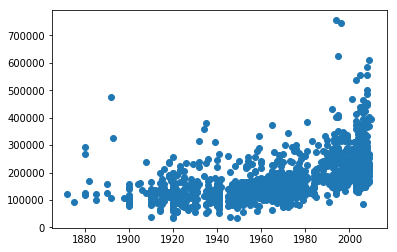

In [13]:
plt.scatter(df['YearBuilt'], df['SalePrice'])

### Generic Transformations:
- Polynomial range: [-2, -1, 1, 2, 3]

1) Linear

2) Polynomial

3) Inverted Polynomial

In [112]:
X = df[['YearBuilt']].copy()
y = df['SalePrice'].copy()

for feat in X.columns:
    min_err = 10e6
    feat_space = [[feat]]
    for deg in range(2, 4):
        feat_name = feat + "_deg{}".format(deg)
        X[feat_name] = X[feat] ** deg
        feat_space.append([*feat_space[-1], feat_name])
    for inv_state, target in enumerate([y, 1/y]):
        X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33)
        for deg, feats in enumerate(feat_space, 1):
            model = LinearRegression()
            model.fit(X_train[feats], y_train)
            y_pred = model.predict(X_test[feats])
            err = mean_squared_error(y_test, y_pred)
            if err < min_err:
                min_err, best_inv_state, best_feature_state = err, inv_state, list(zip(feats, model.coef_))
    if best_inv_state:
        denom_str = " + ".join([str(x[1])+" * "+str(x[0]) for x in best_feature_state])
        print('1 / ({})'.format(denom_str))
        # X['1 / ({})'.format(denom_str)]

1 / (1.9751553508611947e-06 * YearBuilt + -5.159403724195708e-10 * YearBuilt_deg2)
